The Titan Dataset is the "Hello World" to the Machine Learning World. <br>
We will be doing the following steps:
1. Defining the problem
2. Acquring the Dataset
3. Checking if its Supervised/Unsupervised
4. Doing EDA : Exploratory Data Analysis
5. Do Feature Engineering
6. Apply ML Model
7. Check for Model Performance
8. Tune the model and check the performance again


Let's Checkout the Data

## IMPORTING DATASET

In [1]:

## pre used in All Kaggle Notebooks.
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import numpy as np ## Import the Numpy Library : For using np arrays, algebra, matrices, tranformation
import pandas as pd ## Import the pandas Library to load and transform data in dataframes
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:

titanic_train_df = pd.read_csv("input/train.csv")
titanic_test_df = pd.read_csv("input/test.csv")
titanic_test_df1 = pd.read_csv("input/test.csv")

> In the Code Above, I have copied the input path from Top Right Corner of the window in location 
> <br>
> DATA->input->train.csv (Click on icon "Copy to Clipboard"
> <br>
> Similarly to import test data
> <br>
> DATA->input->test.csv 

Let us checkout our dataset. To checkout the data, we will use a function, "head" which fetches the top 5 observations from our data. 
So, if we want to fetch more than 5 rows, (say we want to check 10 rows), we will simply pass the number of rows we want to see as an argument
Similarly, if we want to check the last 5 observations, we will use a function, "tail", and if we pass a whole number n, it will fetch n rows from the bottom.
Prepared a sample below:

In [4]:
##Checkout observations loaded in out pandas dataset
titanic_train_df.head(10)  ## Number of rows to be fetched is 10, if left blank, default is 5

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [5]:
## Using tail function on our test data. Tail will fetch last nth observations passed into the function, default is 5
titanic_test_df.tail(10)

PassengerId  Pclass                                             Name  \
408         1300       3                  Riordan, Miss. Johanna Hannah""   
409         1301       3                        Peacock, Miss. Treasteall   
410         1302       3                           Naughton, Miss. Hannah   
411         1303       1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
412         1304       3                   Henriksson, Miss. Jenny Lovisa   
413         1305       3                               Spector, Mr. Woolf   
414         1306       1                     Oliva y Ocana, Dona. Fermina   
415         1307       3                     Saether, Mr. Simon Sivertsen   
416         1308       3                              Ware, Mr. Frederick   
417         1309       3                         Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
408  female   NaN      0      0              334915    7.7208   NaN        Q  
409  female   3.0      1      1  SOTON/O.Q. 3101315   13.7750   NaN        S  
410  female   NaN      0      0              365237    7.7500   NaN        Q  
411  female  37.0      1      0               19928   90.0000   C78        Q  
412  female  28.0      0      0              347086    7.7750   NaN        S  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C

## Supervised/Unsupervised 

**OKAY!!! So clearly, we can see that the train data has Survived Column, whereas testing data does not have it**

![](http://)So basically, Above Problem is Supervised Machine Learning Problem, with our label (to be predicted) is *Survived* whereas the rest will be our features

## Doing EDA : Exploratory Data Analysis

a.Let's Checkout the size of data

In [6]:
titanic_train_df.shape

(891, 12)

In [7]:
titanic_test_df.shape

(418, 11)

418--> Number of training observation<br>
891--> Number of testing observation

b. Check for data type, via .info method

In [8]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Name, Age, Sex, Ticket, Cabin, Embarked --> All are non integer values, rest are integer values. The .describe method further gives information about our data

In [9]:
titanic_train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Age column has some null values

Lets check some observations with graphs

In [10]:
titanic_train_df_survived = titanic_train_df[titanic_train_df['Survived'] == 1]

In [11]:
survived_gender = titanic_train_df_survived.groupby('Sex', as_index=False).count()

<BarContainer object of 2 artists>

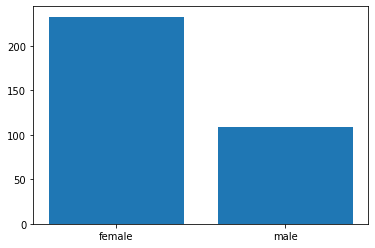

In [12]:
plt.bar(survived_gender['Sex'], survived_gender['Survived'])

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0.0, 180.0)

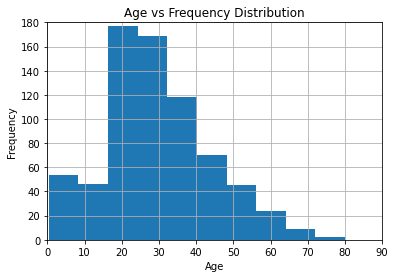

In [13]:
##Ages that boarded the ship
plt.hist(titanic_train_df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency Distribution')
plt.grid(True)
plt.xlim(0,90)
plt.ylim(0,180)

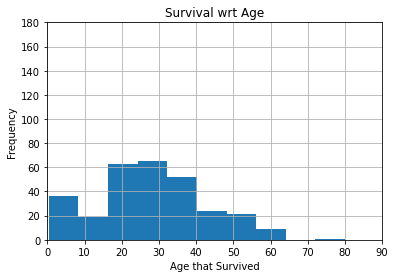

In [14]:
##Ages that survived More
plt.hist(titanic_train_df_survived['Age'])
plt.xlabel('Age that Survived')
plt.ylabel('Frequency')
plt.title('Survival wrt Age')
plt.xlim(0,90)
plt.ylim(0,180)
plt.grid(True)

In [15]:
##To checkout which embarkment had max passengers
titanic_train_df_embark = titanic_train_df.groupby('Embarked', as_index=False).count()
titanic_train_df_survived_embark = titanic_train_df_survived.groupby('Embarked', as_index=False).count()

<BarContainer object of 3 artists>

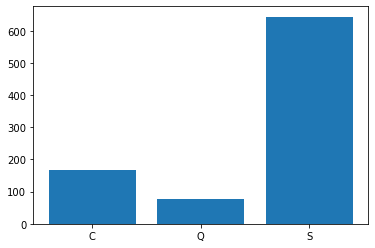

In [16]:
plt.bar(titanic_train_df_embark['Embarked'],titanic_train_df_embark['Survived'])

Max boarders were from South Hampton. 
<BR>
Below graph will help us identify passengers from which embarkment survived more

<BarContainer object of 3 artists>

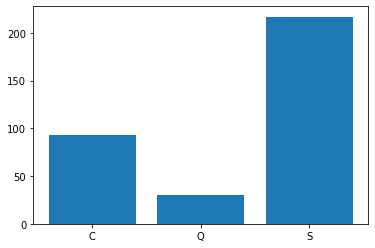

In [17]:
plt.bar(titanic_train_df_survived_embark['Embarked'],titanic_train_df_survived_embark['Survived'])

In [18]:
titanic_train_df_survived_embark

Embarked  PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
0        C           93        93      93    93   93   79     93     93   
1        Q           30        30      30    30   30    8     30     30   
2        S          217       217     217   217  217  201    217    217   

   Ticket  Fare  Cabin  
0      93    93     52  
1      30    30      2  
2     217   217     80

In [19]:
titanic_train_df_embark

Embarked  PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
0        C          168       168     168   168  168  130    168    168   
1        Q           77        77      77    77   77   28     77     77   
2        S          644       644     644   644  644  554    644    644   

   Ticket  Fare  Cabin  
0     168   168     69  
1      77    77      4  
2     644   644    129

"cabin" column seems to have too many NA values.
Let us check which columns have High NA values

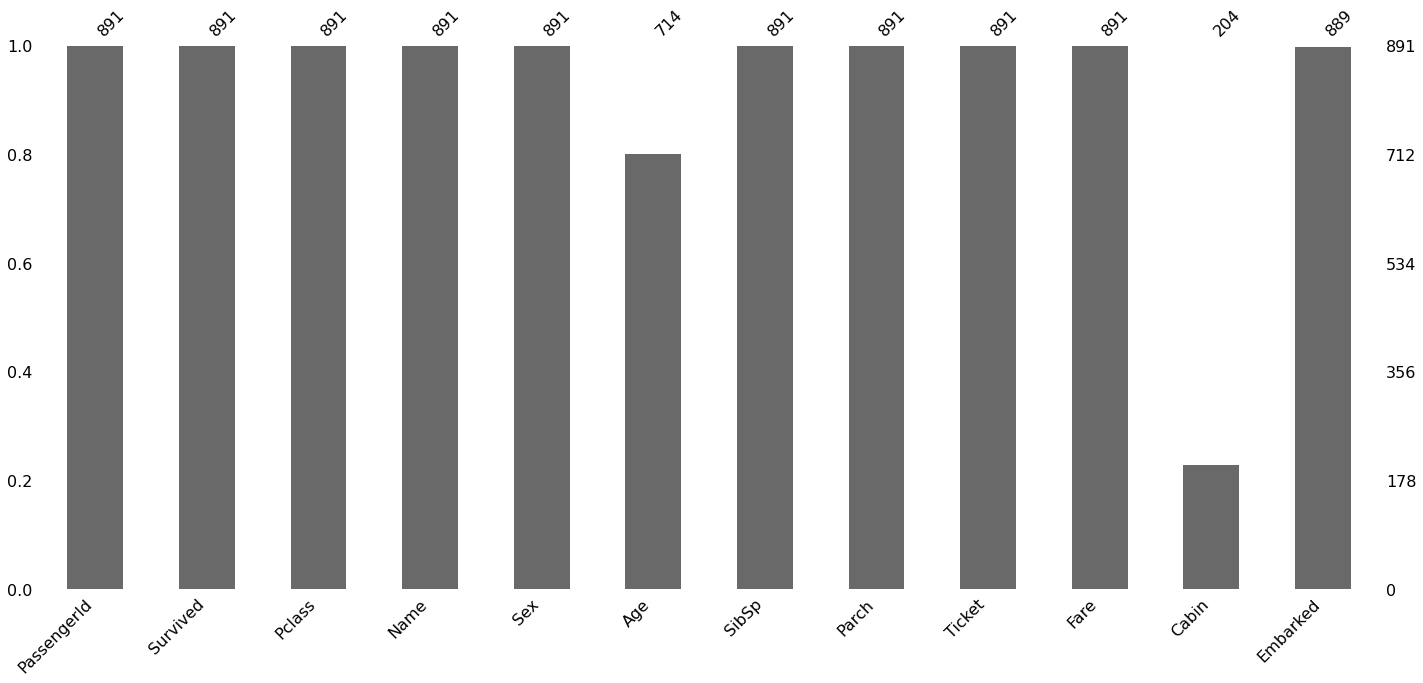

In [20]:
p=msno.bar(titanic_train_df)

Age and Cabin values have NA value,
Cabin has high NA value, so this may be not be used as a feature

Lets checkout SibSp feature

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

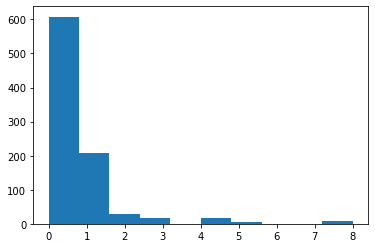

In [21]:
plt.hist(titanic_train_df['SibSp'])

Parent/Sibling that survived were :


(array([210.,   0., 112.,   0.,   0.,  13.,   0.,   4.,   0.,   3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

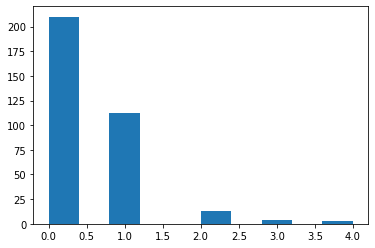

In [22]:
plt.hist(titanic_train_df_survived['SibSp'])


Range of fare was as follows: 


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

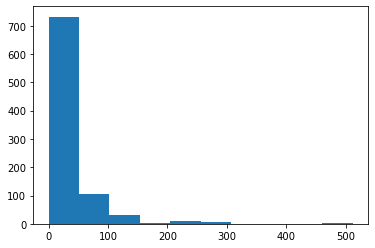

In [23]:
plt.hist(titanic_train_df['Fare'])

Those that survived had paid in the fare range of :


(array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

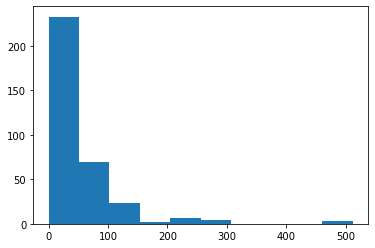

In [24]:
plt.hist(titanic_train_df_survived['Fare'])

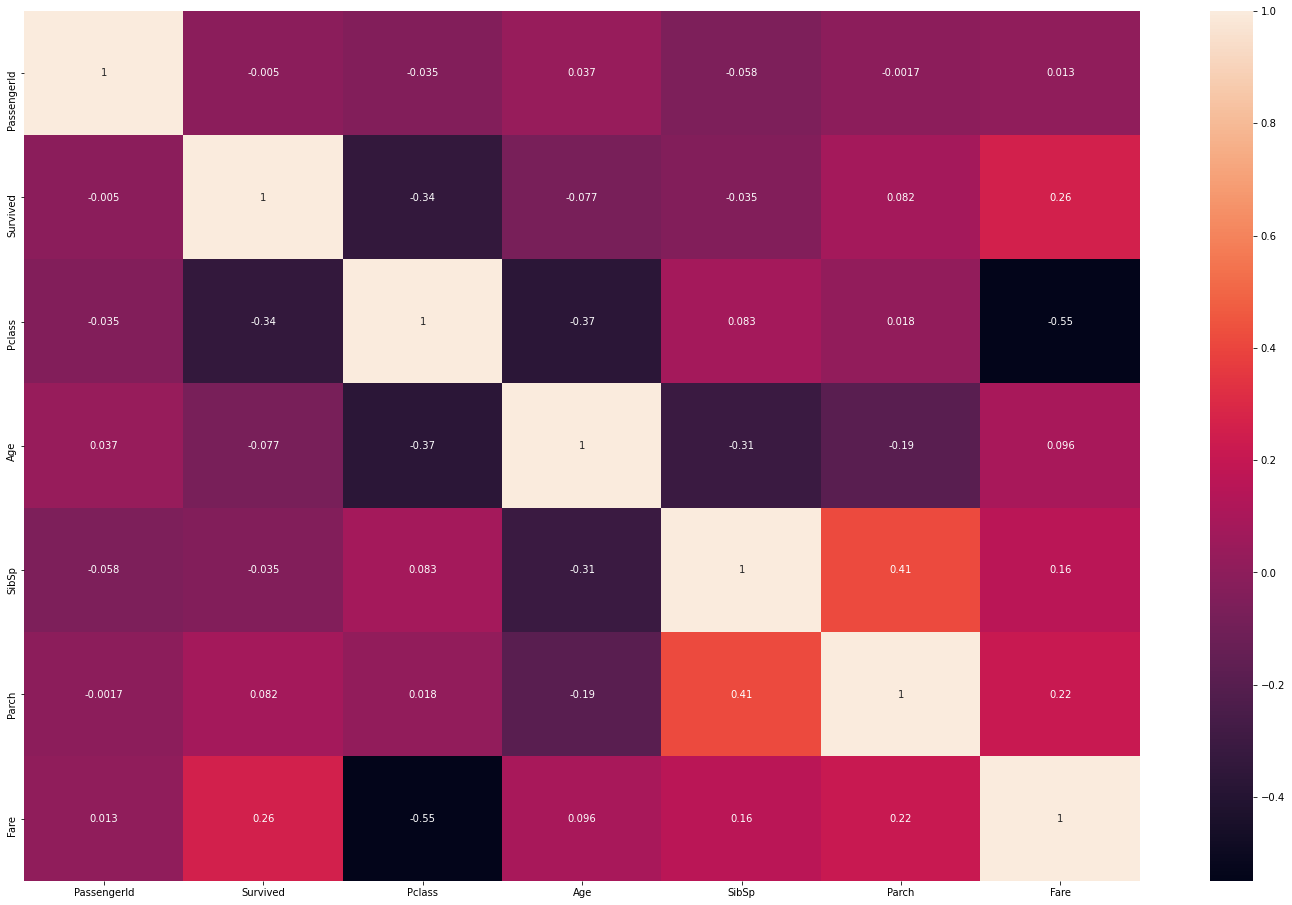

In [25]:
f, ax = plt.subplots(figsize = [25,16])
p=sns.heatmap(titanic_train_df.corr(),annot=True)

Correalation will be better seen after encoding of cateogrical values is done

We will remove Name, Cabin values

In [26]:
titanic_train_df.drop(columns=['Name','Cabin','Ticket'] , inplace=True)

In [27]:
titanic_test_df.drop(columns=['Name','Cabin','Ticket'] , inplace=True)


In [28]:
titanic_test_df.shape

(418, 8)

## Feature Engineering

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(titanic_train_df['Sex'])

LabelEncoder()

In [30]:
titanic_train_df['Sex']= le.transform(titanic_train_df['Sex'])

In [31]:
titanic_test_df['Sex'] = le.transform(titanic_test_df['Sex'])

In [32]:
titanic_test_df.shape

(418, 8)

Now we will encode "Embarked" which is of type object

In [33]:
leembark=LabelEncoder()
leembark.fit(titanic_train_df['Embarked'].astype(str))

LabelEncoder()

In [34]:
titanic_train_df['Embarked'] = leembark.transform(titanic_train_df['Embarked'].astype(str))
titanic_test_df['Embarked'] = leembark.transform(titanic_test_df['Embarked'].astype(str))


In [35]:
titanic_test_df.shape


(418, 8)

In [36]:
titanic_train_df_x = titanic_train_df.drop(columns=['Survived'])

In [37]:
titanic_train_df_y =titanic_train_df['Survived'].to_frame()

In [38]:
titanic_train_df_x

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1       3    1  22.0      1      0   7.2500         2
1              2       1    0  38.0      1      0  71.2833         0
2              3       3    0  26.0      0      0   7.9250         2
3              4       1    0  35.0      1      0  53.1000         2
4              5       3    1  35.0      0      0   8.0500         2
..           ...     ...  ...   ...    ...    ...      ...       ...
886          887       2    1  27.0      0      0  13.0000         2
887          888       1    0  19.0      0      0  30.0000         2
888          889       3    0   NaN      1      2  23.4500         2
889          890       1    1  26.0      0      0  30.0000         0
890          891       3    1  32.0      0      0   7.7500         1

[891 rows x 8 columns]

In [39]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [40]:
titanic_train_df_x = si.fit_transform(titanic_train_df_x)

In [41]:
titanic_test_df = si.transform(titanic_test_df)

We will now scale the data, Scaling is used to reduce the effect of feature with higher magintude to take over a feature will lower magnitude 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [43]:
titanic_train_df_x = sc.fit_transform(titanic_train_df_x)

In [44]:
titanic_test_df = sc.transform(titanic_test_df)

## APPLYING ML MODEL

We will be predicting this with svm

In [45]:
titanic_test_df

array([[ 1.73399584,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49078316, -0.67867322],
       [ 1.73788372,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.50747884,  0.58111394],
       [ 1.74177161, -0.36936484,  0.73769513, ..., -0.47367361,
        -0.45336687, -0.67867322],
       ...,
       [ 3.34746731,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58111394],
       [ 3.35135519,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.48633742,  0.58111394],
       [ 3.35524307,  0.82737724,  0.73769513, ...,  0.76762988,
        -0.19824428, -1.93846038]])

In [46]:
from sklearn.svm import SVC

In [47]:
clf_svm = SVC(C=0.8)

In [48]:
clf_svm.fit(titanic_train_df_x, titanic_train_df_y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.8)

In [49]:
svm_pred = clf_svm.predict(titanic_test_df)

In [50]:
svm_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
titanic_test_df1['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [52]:
result_df = pd.DataFrame({'PassengerID':titanic_test_df1['PassengerId'],'Survived':svm_pred})

In [53]:
result_df.head()

PassengerID  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [54]:
result_df.to_csv('csv_to_submit.csv', index = False)
